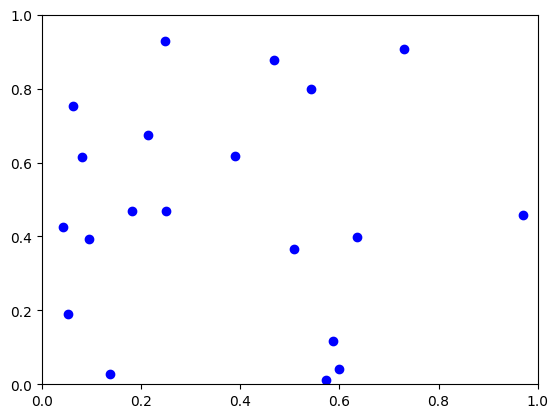

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

L = 1 # Size of the box
d = 0.01
m = 1
T = 1
KB = 1
N = 20  # Number of atoms
total_time = 10
dt = 0.01
steps = int(total_time / dt)

def initialize_system():
    positions = np.random.rand(N, 2) * L  # Random positions inside the box , 2 corresponds to the 2D space (x and y coordinates).
    velocities = np.random.normal(loc=0, scale=np.sqrt(KB*T / m), size=(N, 2))  # Maxwell-Boltzmann distributed velocities
    return positions, velocities

def update_positions_and_velocities(positions, velocities):
    positions += velocities * dt
    
    # Handle collisions with walls
    for i in range(N): # This loop iterates over each atom in the system
        for j in range(2):  # This loop iterates over each dimension (x and y) of the position of the atom.
            if positions[i, j] < 0:
                positions[i, j] = -positions[i, j] # This updates the position of the atom by reflecting it across the boundary, effectively bouncing it off the wall.
                velocities[i, j] = -velocities[i, j] # This updates the velocity of the atom by reversing its direction in the jth dimension, ensuring conservation of momentum.
            elif positions[i, j] > L:
                positions[i, j] = 2*L - positions[i, j]
                velocities[i, j] = -velocities[i, j]
    
    # Collisions between pairs of atoms
    for i in range(N):
        for j in range(i+1, N): # This loop iterates over the remaining atoms in the system
                                # starting from the atom following the current ith atom (i+1) and continuing to the last atom (N-1)
            
            rij = positions[j] - positions[i] # Relative position
            rij_norm = np.linalg.norm(rij) 
            # The Euclidean norm is essential in the provided code for accurately detecting collisions between atoms in the simulation

            if rij_norm < 2 * d: # Checking for collisions
                rij_hat = rij / rij_norm # Is used to determine the direction of the collision
                vi_parallel = np.dot(velocities[i], rij_hat) * rij_hat # This calculates the component of the velocity of the ith atom parallel to the direction of the collision.
                vj_parallel = np.dot(velocities[j], rij_hat) * rij_hat # This calculates the component of the velocity of the jth atom parallel to the direction of the collision.
                vi_perpendicular = velocities[i] - vi_parallel # This calculates the component of the velocity of the ith atom perpendicular to the direction of the collision.
                vj_perpendicular = velocities[j] - vj_parallel # This calculates the component of the velocity of the jth atom perpendicular to the direction of the collision.
                velocities[i] = vi_perpendicular + vj_parallel
                velocities[j] = vj_perpendicular + vi_parallel

# Create figure and axis for animation
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)

# Create a plot object for atoms
atoms, = ax.plot([], [], 'bo', ms=6)
# Are empty lists, representing the initial x and y coordinates of the data points to be plotted. Since they are empty, no data points are initially plotted on the axis.


# Function to initialize the plot
def init():
    atoms.set_data([], [])
    return atoms,

# Function to update the plot for each frame of the animation
def animate(frame):
    update_positions_and_velocities(positions, velocities)
    atoms.set_data(positions[:, 0], positions[:, 1])
    return atoms,

# Initialize the system
positions, velocities = initialize_system()

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=steps, init_func=init, blit=True)

# Save the animation as a GIF
ani.save('molecular_dynamics_with_collisions.gif', writer='pillow', fps=30)

plt.show()
